In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [95]:
def img_to_sketch(path):
    """
    Converts RGB image into Pencil Sketch Image then prints the original and final image.

    Args:
        path (str): Location of RGB image

    Returns:
        null
    """
    img = cv2.imread(path)

    # Enhance details
    eimg = cv2.detailEnhance(img, sigma_s=5, sigma_r=0.15)

    # REDUCE BRIGHTNESS
    
    hsv = cv2.cvtColor(eimg, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - 70 #eg: 205
    v[v > lim] -= 70

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

    # Blur Image a bit
    img_blur = cv2.GaussianBlur(eimg, (5,5), 0) 

    # Get grayscale image and extract edges as well
    gray_img = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
    sobel_img_one = cv2.Sobel(src=gray_img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

    # Subtract gray image from edge. Important features will have low values and others high
    # Set values above 50 to white for paper background and increase the value of the others so
    # they dont appear too dark on the paper
    final_img = gray_img - sobel_img_one
    thresh = np.mean(final_img) / 3
    
    final_img[final_img < 0] = 0
    final_img[final_img > thresh] = 255

    if np.std(final_img) <= 80:
        final_img[final_img == 0] += 80
        
    # Display the original picture and the sketch
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,10))
    ax1.imshow(eimg)
    ax1.set_title("Original Image")
    ax2.imshow(final_img, cmap = 'gray', vmin=0, vmax=255)
    ax2.set_title("Sketch Image")
    plt.show()

    return

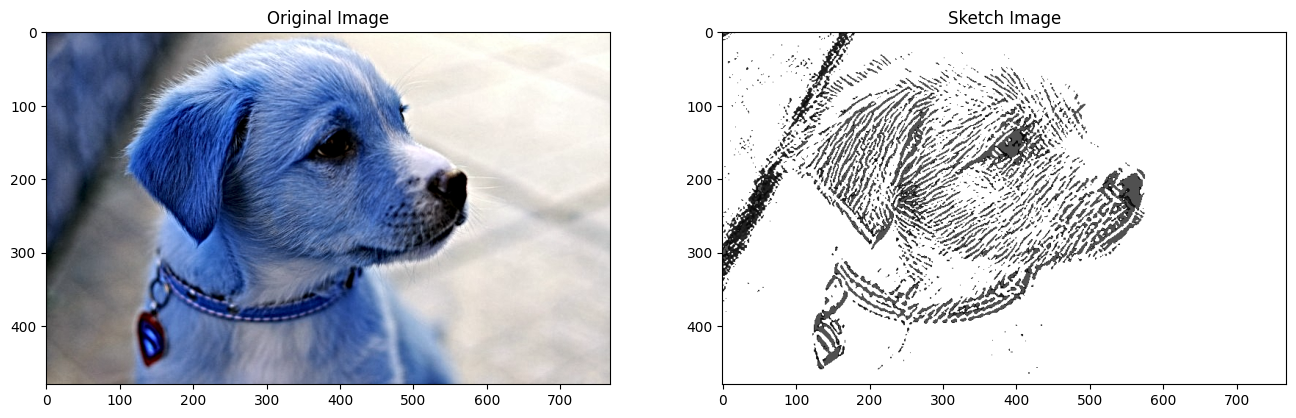

In [96]:
img_to_sketch('/kaggle/input/image-to-pencil-sketch/dog.jpg')

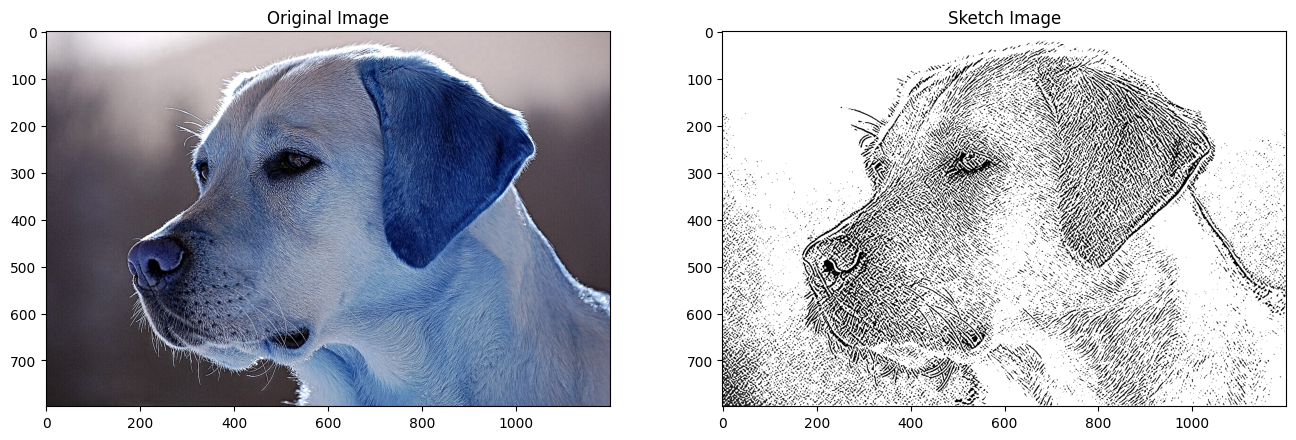

In [97]:
img_to_sketch('/kaggle/input/dog-test-sketch/Labrador_Retriever_portrait.jpg')